In [1]:
import scipy

In [4]:
?scipy.optimize.curve_fit

Signature:
scipy.optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 

In [14]:
from scipy import optimize

data_x0 = [2.1, 0.5, 0.9, 1.7, 1.1]
result = optimize.minimize(optimize.rosen, data_x0, method='Nelder-Mead', tol=1e-5)
result.x

array([-0.96205046,  0.93573826,  0.88071191,  0.77787492,  0.6050894 ])

In [2]:
import numpy as np
def gaussian_fun(x, a, b):
    return 1/a*np.exp(-(x-b)**2/a**2)


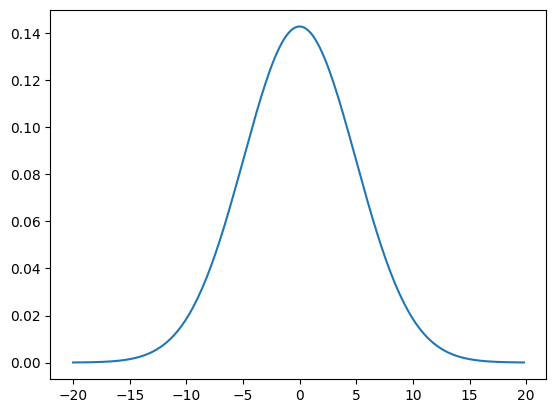

In [11]:
x = np.arange(-20,20, 0.2)
y = gaussian_fun(x, 7, 0)

import matplotlib.pyplot as plt
plt.plot(x,y)

In [2]:
class Employee:
    count = 0 # public variable
    __raise_amt = 1.04 # private
    ID_num = 0

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first + '.' + last + '@email..com'
        Employee.count +=1 # class variable, not instance variable: self.count
        self.ID_num = Employee.count

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay*self.__raise_amt)
        

In [3]:
James = Employee('James', 'Bennet', '100000')

In [4]:
James.fullname()

'James Bennet'

In [5]:
print('employee count:' + str(James.count))
Alice = Employee("Alice", 'Davis', '100000')
print('employee count:' + str(James.count))

employee count:1
employee count:2


In [6]:
print('employee ID:' + str(James.ID_num))

print('employee ID:' + str(Alice.ID_num))


employee ID:1
employee ID:2


In [7]:
Bob = Employee("Bob", 'Sanchez', '100000')
print('employee ID:' + str(Alice.ID_num))
print('employee ID:' + str(Bob.ID_num))

employee ID:2
employee ID:3


In [1]:
import pandas as pd

In [6]:
df = pd.DataFrame({'State':['Arizona AZ','Georgia GA','Florida FL'], 'Score':[62,47,55]
                })
df

,State,Score
0,Arizona AZ,62
1,Georgia GA,47
2,Florida FL,55


In [7]:
df['State'][1]

'Georgia GA'

In [8]:
df['State'].str[-2:]

0    AZ
1    GA
2    FL
Name: State, dtype: object

## sktime`, a unified framework for machine learning with time series

In [3]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

import numpy as np

In [4]:
# data specification
y = load_airline()

# specifying forecasting horizon
fh = np.arange(1,37)

# spcifying the forecasting algorithm
forecaster = NaiveForecaster(strategy='last', sp=12)

# fitting the forecaster
forecaster.fit(y)

# querying prediction
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

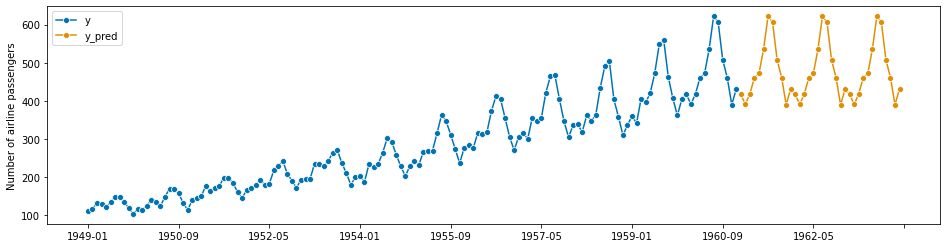

In [6]:
# plotting predictions and past data
from sktime.utils.plotting import plot_series

plot_series(y, y_pred, labels=["y", "y_pred"])

In [8]:
y.shape

(144,)

In [14]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

In [17]:
y

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [12]:
type(y)

pandas.core.series.Series

In [18]:
yy = y.to_numpy()

In [19]:
yy

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

date time package

In [1]:
import datetime
today = datetime.date.today()
today

datetime.date(2022, 10, 14)

In [5]:
currentYear = today.year
print(currentYear)
currentWeekday = today.weekday
currentWeekday()


2022


4

In [6]:
# chained assignment
a = b = c = {"language": "Python"}

a["language"] = "Julia"
print(b["language"])

Julia
